In [7]:
from dataclasses import dataclass
from typing import Optional
from langgraph.graph import StateGraph, END
from IPython.display import Image, display

In [8]:
@dataclass
class ConversationState:
    user_input: Optional[str] = None
    mensaje: Optional[str] = None
    saldo: int = 1000

In [9]:
def nodo_inicio(state: ConversationState) -> ConversationState:
    return ConversationState(
        user_input=state.user_input,
        mensaje=" Bienvenido a tu banco. ¿Qué deseas hacer? Opciones: Consultar, retirar, depositar, salir"
    )

def nodo_consultar(state: ConversationState) ->  ConversationState:
    return ConversationState(
        user_input=state.user_input,
        mensaje=f"Tu saldo actual es: ${state.saldo}"
    )

def nodo_retirar(state: ConversationState) -> ConversationState:
    return ConversationState(
        user_input=state.user_input,
        mensaje="¿Cuánto dinero deseas retirar?: ",
        saldo = state.saldo - int(input("Ingresa el saldo a retirar: "))  
    )
    
def nodo_depositar(state: ConversationState) -> ConversationState:
    return ConversationState(
        user_input=state.user_input,
        mensaje=f"¿Cuánto dinero deseas depositar? ",
        saldo= state.saldo + int(input("Ingresa el saldo a depositar: "))        
    )

def nodo_saldo(state: ConversationState) -> ConversationState:
    return ConversationState(
        user_input=state.user_input,
        mensaje=f"Tu nuevo saldo es: ${state.saldo}",
        saldo=state.saldo
    )
    
def nodo_default(state: ConversationState) -> ConversationState:
    return ConversationState(
        user_input=state.user_input,
        mensaje="No entendi tu respuesta."
    )

In [10]:
def decidir_ruta(state: ConversationState) -> str:
    if state.user_input is None:
        return "default"
    texto = state.user_input.lower().strip()
    if texto == "consultar":
        return "consultar"
    elif texto == "retirar":
        return "retirar"
    elif texto == "depositar":
        return "depositar"
    else:
        return "default"

In [11]:
graph = StateGraph(ConversationState)

graph.add_node("inicio", nodo_inicio)
graph.add_node("consultar", nodo_consultar)
graph.add_node("retirar", nodo_retirar)
graph.add_node("depositar", nodo_depositar)
graph.add_node("saldo", nodo_saldo)
graph.add_node("default", nodo_default)

graph.set_entry_point("inicio")

graph.add_conditional_edges(
    "inicio",
    decidir_ruta,
    {
        "consultar": "consultar",
        "retirar": "retirar",
        "depositar": "depositar",        
        "default": "default",
    }
)

graph.add_edge("consultar", "saldo")
graph.add_edge("retirar", "saldo")
graph.add_edge("depositar", "saldo")
graph.add_edge("default", END)

app = graph.compile()

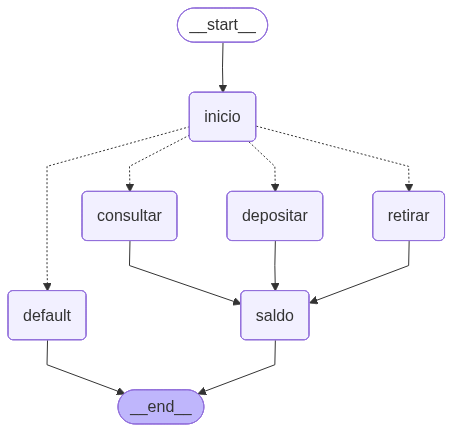

In [15]:
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
if __name__ == "__main__":
    state = ConversationState(user_input=input("Tú: "))
    for step in app.stream(state):
        print(step)

{'inicio': {'user_input': 'retirar', 'mensaje': ' Bienvenido a tu banco. ¿Qué deseas hacer? Opciones: Consultar, retirar, depositar, salir', 'saldo': 1000}}
{'retirar': {'user_input': 'retirar', 'mensaje': '¿Cuánto dinero deseas retirar?: ', 'saldo': 875}}
{'saldo': {'user_input': 'retirar', 'mensaje': 'Tu nuevo saldo es: $875', 'saldo': 875}}
